# Browsertrix Progress

When browsertrix-crawler runs it generates a line oriented JSON log file.

In [1]:
import json

lines = list(map(json.loads, open('data/btrix-crawl.log')))
lines[0:10]

[{'timestamp': '2024-05-07T23:11:26.459Z',
  'logLevel': 'info',
  'context': 'general',
  'message': 'Browsertrix-Crawler 1.1.2 (with warcio.js 2.2.1)',
  'details': {}},
 {'timestamp': '2024-05-07T23:11:26.460Z',
  'logLevel': 'info',
  'context': 'general',
  'message': 'Seeds',
  'details': [{'url': 'http://www.buffon.cnrs.fr/',
    'scopeType': 'prefix',
    'include': ['/^https?:\\/\\/www\\.buffon\\.cnrs\\.fr\\//'],
    'exclude': ['/.*fig=.*fig=.*/'],
    'allowHash': False,
    'depth': -1,
    'sitemap': None,
    'maxExtraHops': 0,
    'maxDepth': 1000000,
    '_excludeStr': '.*fig=.*fig=.*'}]},
 {'timestamp': '2024-05-07T23:11:26.728Z',
  'logLevel': 'info',
  'context': 'worker',
  'message': 'Creating 4 workers',
  'details': {}},
 {'timestamp': '2024-05-07T23:11:26.729Z',
  'logLevel': 'info',
  'context': 'worker',
  'message': 'Worker starting',
  'details': {'workerid': 0}},
 {'timestamp': '2024-05-07T23:11:26.729Z',
  'logLevel': 'info',
  'context': 'worker',
  'mess

Some of the messages are have `context: crawlStatus` that provide information about how many pages have been crawled, and how many have yet to be crawled. For a long running crawl this can provide some useful information to see how long the crawl might take, since it's often difficult to known the dimensions of a website.

In [2]:
crawl_status = list(filter(lambda l: l['context'] == 'crawlStatus', lines))
crawl_status[0:5]

[{'timestamp': '2024-05-07T23:11:26.823Z',
  'logLevel': 'info',
  'context': 'crawlStatus',
  'message': 'Crawl statistics',
  'details': {'crawled': 0,
   'total': 1,
   'pending': 1,
   'failed': 0,
   'limit': {'max': 0, 'hit': False},
   'pendingPages': ['{"seedId":0,"started":"2024-05-07T23:11:26.731Z","extraHops":0,"url":"http://www.buffon.cnrs.fr/","added":"2024-05-07T23:11:26.492Z","depth":0}']}},
 {'timestamp': '2024-05-07T23:11:29.921Z',
  'logLevel': 'info',
  'context': 'crawlStatus',
  'message': 'Crawl statistics',
  'details': {'crawled': 0,
   'total': 64,
   'pending': 4,
   'failed': 0,
   'limit': {'max': 0, 'hit': False},
   'pendingPages': ['{"seedId":0,"started":"2024-05-07T23:11:29.774Z","extraHops":0,"url":"http://www.buffon.cnrs.fr/cs.php?lang=fr","added":"2024-05-07T23:11:29.591Z","depth":1}',
    '{"seedId":0,"started":"2024-05-07T23:11:29.774Z","extraHops":0,"url":"http://www.buffon.cnrs.fr/?lang=fr","added":"2024-05-07T23:11:29.590Z","depth":1}',
    '{"se

In [3]:
import pandas

df = pandas.DataFrame(crawl_status)
df

,timestamp,logLevel,context,message,details
0,2024-05-07T23:11:26.823Z,info,crawlStatus,Crawl statistics,"{'crawled': 0, 'total': 1, 'pending': 1, 'fail..."
1,2024-05-07T23:11:29.921Z,info,crawlStatus,Crawl statistics,"{'crawled': 0, 'total': 64, 'pending': 4, 'fai..."
2,2024-05-07T23:11:29.921Z,info,crawlStatus,Crawl statistics,"{'crawled': 0, 'total': 64, 'pending': 4, 'fai..."
3,2024-05-07T23:11:29.923Z,info,crawlStatus,Crawl statistics,"{'crawled': 0, 'total': 64, 'pending': 4, 'fai..."
4,2024-05-07T23:11:31.161Z,info,crawlStatus,Crawl statistics,"{'crawled': 1, 'total': 64, 'pending': 4, 'fai..."
...,...,...,...,...,...
14099,2024-05-08T12:41:51.003Z,info,crawlStatus,Crawl statistics,"{'crawled': 14096, 'total': 46225, 'pending': ..."
14100,2024-05-08T12:41:53.604Z,info,crawlStatus,Crawl statistics,"{'crawled': 14097, 'total': 46229, 'pending': ..."
14101,2024-05-08T12:41:54.284Z,info,crawlStatus,Crawl statistics,"{'crawled': 14098, 'total': 46229, 'pending': ..."
14102,2024-05-08T12:41:54.707Z,info,crawlStatus,Crawl statistics,"{'crawled': 14099, 'total': 46229, 'pending': ..."


Lets clean up the data a bit so we can work with it easier in Pandas.

Convert the timestamp column from a string to a datetime.

In [4]:
df.timestamp = pandas.to_datetime(df.timestamp)

Extract the `crawled` and `total` values from the serialized dictionary in the `details` column.

In [5]:
df['crawled'] = df.details.apply(lambda d: d['crawled'])
df['pages_to_crawl'] = df.details.apply(lambda d: d['total'])

Now we can plot the number of pages crawled, and the total pages to crawl (which changes as browsertrix discovers them in new pages).

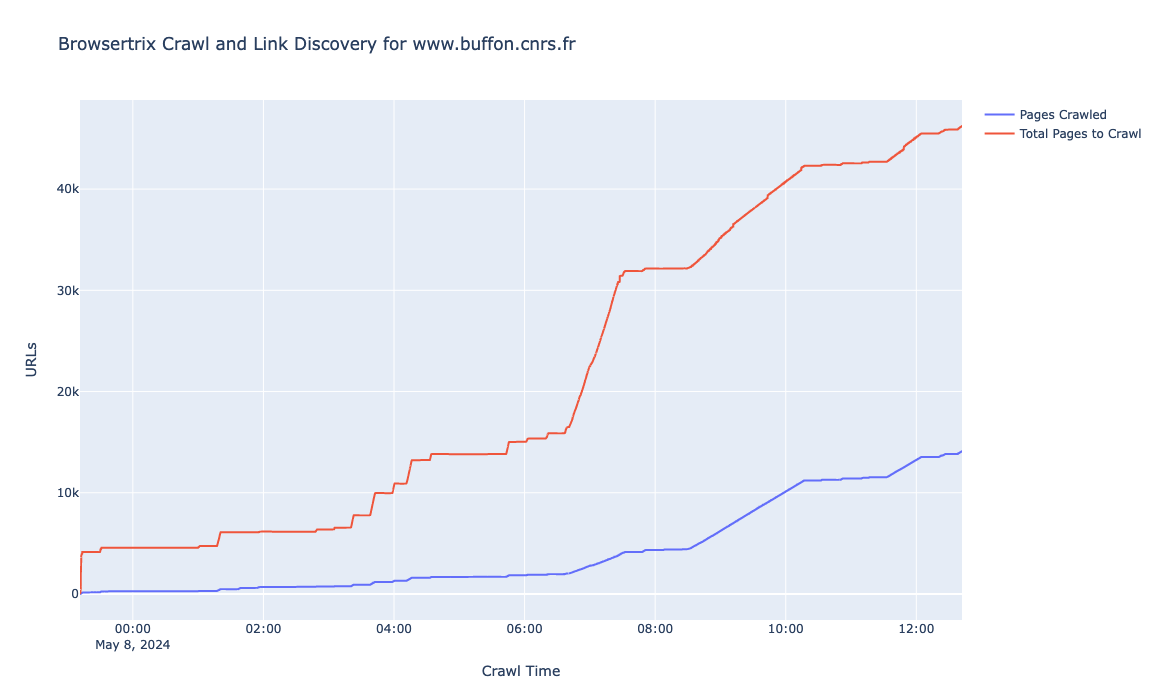

In [17]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df.timestamp,
        y=df.crawled,
        mode='lines',
        name='Pages Crawled',
        line={'shape': 'spline'}
    )
)

fig.add_trace(
    go.Scatter(
        x=df.timestamp,
        y=df.pages_to_crawl,
        mode='lines',
        name='Total Pages to Crawl',
        line={'shape': 'spline'}
    )
)

fig.update_layout(
    title='Browsertrix Crawl and Link Discovery for www.buffon.cnrs.fr',
    height=700,
    yaxis_title='URLs',
    xaxis_title='Crawl Time'
)

fig

In [63]:
from scipy.stats import linregress

crawled_line = linregress(x=df.timestamp.to_numpy(dtype=float), y=df.crawled)
total_line = linregress(x=df.timestamp.to_numpy(dtype=float), y=df.pages_to_crawl)

print(crawled_line)
print(total_line)

LinregressResult(slope=3.659755078527848e-10, intercept=-627698579.0215164, rvalue=0.9112219436982991, pvalue=0.0, stderr=1.3931435705488922e-12, intercept_stderr=2389460.6078011747)
LinregressResult(slope=1.1221160219141554e-09, intercept=-1924572951.3339365, rvalue=0.9688762708141956, pvalue=0.0, stderr=2.414260422725134e-12, intercept_stderr=4140836.808945862)


In [52]:
pandas.Timestamp.time()

TypeError: time() takes exactly 1 positional argument (0 given)